# Data Preprocessing

In [1]:
# General imports
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Statistical imports
from scipy.stats import skew, kurtosis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## 1. Introduction

We will perform some preprocessing of data here including one-hot encoding and transformation, while also analyzing multicollinearity.  

### 1.1 Loading Datasets

In [2]:
# Load the training and test datasets from GitHub
df_train = pd.read_csv('https://raw.githubusercontent.com/gustmic/Project-LinReg-Apartments/main/results/featured_training_set_apartments.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/gustmic/Project-LinReg-Apartments/main/results/featured_test_set_apartments.csv')

In [3]:
df_train.head()

,Address,Price,Area,Rooms,Expenses_per_sqm,Age of Building,Floor,Floor_Category,District,District_Floor,Elevator,Balcony,Patio,Fireplace,Subway Station,Grocery Store,Gym,Bakery,Latitude,Longitude
0,Tellusgången 34,4770000,73.0,3.0,69.905008,9.0,5.0,Mid,Telefonplan,Telefonplan-Mid,1,1,0,0,455,402,208,159,59.298699,17.989062
1,Tångvägen 31,2600000,57.0,2.0,75.385965,80.0,3.0,Lo,Hökmossen,Hökmossen-Lo,0,0,0,0,693,581,553,763,59.292110,17.994688
2,Cedergrensvägen 43,3745000,51.0,3.0,84.019608,84.0,1.0,Lo,LM-Staden,LM-Staden-Lo,0,0,0,0,301,236,345,129,59.300796,17.998543
3,Responsgatan 12,2760000,46.0,2.0,68.340343,5.0,3.0,Lo,Telefonplan,Telefonplan-Lo,1,1,0,0,380,69,96,237,59.296459,18.002712
4,Mikrofonvägen 21,4400000,61.0,2.0,60.262295,14.0,4.0,Mid,Telefonplan,Telefonplan-Mid,1,1,0,0,216,105,233,256,59.296911,17.999793


In [4]:
print(df_train.shape)
print(df_test.shape)
print(df_train.columns)
print(df_test.columns)

(380, 20)
(95, 20)
Index(['Address', 'Price', 'Area', 'Rooms', 'Expenses_per_sqm',
       'Age of Building', 'Floor', 'Floor_Category', 'District',
       'District_Floor', 'Elevator', 'Balcony', 'Patio', 'Fireplace',
       'Subway Station', 'Grocery Store', 'Gym', 'Bakery', 'Latitude',
       'Longitude'],
      dtype='object')
Index(['Address', 'Price', 'Area', 'Rooms', 'Expenses_per_sqm',
       'Age of Building', 'Floor', 'Floor_Category', 'District',
       'District_Floor', 'Elevator', 'Balcony', 'Patio', 'Fireplace',
       'Subway Station', 'Grocery Store', 'Gym', 'Bakery', 'Latitude',
       'Longitude'],
      dtype='object')


### 1.2 Highlights of Tasks in this Notebook

- Creating one-hot encoded features
- Analyzing and matching transformation technique with feature
- Transforming features
- Handling multicollinearity

## 2. One-Hot Encoding

We have categorical values in `Floor_Category`, `District`, and `District_Floor`.
<br> To be able to analyze them better and run them in algorithm models it is imperative that we one-hot encode them in separate columns with ones and zeros.

In [5]:
# One-hot encode 'Floor' and 'District' columns
df_encoded_train = pd.get_dummies(df_train, columns=['Floor_Category', 'District', 'District_Floor'], dtype=int, drop_first=True)
df_encoded_test = pd.get_dummies(df_test, columns=['Floor_Category', 'District', 'District_Floor'], dtype=int, drop_first=True)

Note that we are dropping one encoded column to avoid the introduction of multicollinearity when one-hot encoding.

In [6]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

df_encoded_train.head()

,Address,Price,Area,Rooms,Expenses_per_sqm,Age of Building,Floor,Elevator,Balcony,Patio,Fireplace,Subway Station,Grocery Store,Gym,Bakery,Latitude,Longitude,Floor_Category_Lo,Floor_Category_Mid,District_Hökmossen,District_LM-Staden,District_Midsommarkransen,District_Telefonplan,District_Floor_Hökmossen-Lo,District_Floor_LM-Staden-Lo,District_Floor_Midsommarkransen-Hi,District_Floor_Midsommarkransen-Lo,District_Floor_Midsommarkransen-Mid,District_Floor_Telefonplan-Hi,District_Floor_Telefonplan-Lo,District_Floor_Telefonplan-Mid
0,Tellusgången 34,4770000,73.0,3.0,69.905008,9.0,5.0,1,1,0,0,455,402,208,159,59.298699,17.989062,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,Tångvägen 31,2600000,57.0,2.0,75.385965,80.0,3.0,0,0,0,0,693,581,553,763,59.292110,17.994688,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,Cedergrensvägen 43,3745000,51.0,3.0,84.019608,84.0,1.0,0,0,0,0,301,236,345,129,59.300796,17.998543,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,Responsgatan 12,2760000,46.0,2.0,68.340343,5.0,3.0,1,1,0,0,380,69,96,237,59.296459,18.002712,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,Mikrofonvägen 21,4400000,61.0,2.0,60.262295,14.0,4.0,1,1,0,0,216,105,233,256,59.296911,17.999793,0,1,0,0,0,1,0,0,0,0,0,0,0,1


Looks good.

In [7]:
print(df_encoded_train.shape)
print(df_encoded_test.shape)

(380, 31)
(95, 30)


**Comment**
<br> We are missing a feature in the test set, compared to the training set.
<br> Let's examine what's missing in the test set.

In [8]:
# Get the set of columns in both training and test sets
train_columns = set(df_encoded_train.columns)
test_columns = set(df_encoded_test.columns)

# Find the symmetric difference (outer union) to get columns that are in either set but not both
outer_union_columns = train_columns.symmetric_difference(test_columns)

# Print the results
print("Columns that are either in the training set or test set but not both:", outer_union_columns)

Columns that are either in the training set or test set but not both: {'District_Floor_Midsommarkransen-Hi'}


**Comment**
<br> We can note that we have one feature that exists in the training set, but not in the test set since it is unusual that apartments exhibit this attribute (Floor lever Hi in Midsommarkransen).
<br> We will handle it by creating this column also in the test set and fill it with zeros.

In [9]:
# Add the missing column to the test set and fill with 0
df_encoded_test['District_Floor_Midsommarkransen-Hi'] = 0

# Recheck the shapes to ensure they now match
print(df_encoded_train.shape)
print(df_encoded_test.shape)


(380, 31)
(95, 31)


Let's rename and rearrange the order of features.

In [10]:
def fix_cols(df):
    # Rename columns
    df.rename(columns={
        'District_Floor_Hökmossen-Lo': 'District_Hökmossen_Floor_Lo',
        'District_Floor_LM-Staden-Lo': 'District_LM-Staden_Floor_Lo',
        'District_Floor_Midsommarkransen-Hi': 'District_Midsommarkransen_Floor_Hi',
        'District_Floor_Midsommarkransen-Lo': 'District_Midsommarkransen_Floor_Lo',
        'District_Floor_Midsommarkransen-Mid': 'District_Midsommarkransen_Floor_Mid',
        'District_Floor_Telefonplan-Hi': 'District_Telefonplan_Floor_Hi',
        'District_Floor_Telefonplan-Lo': 'District_Telefonplan_Floor_Lo',
        'District_Floor_Telefonplan-Mid': 'District_Telefonplan_Floor_Mid'
    }, inplace=True)

    # Reorder columns
    new_column_order = [
        'Address', 'Price', 'Area', 'Rooms', 'Expenses_per_sqm', 'Age of Building', 
        'Floor', 'Subway Station', 'Grocery Store', 'Gym', 'Bakery', 'Latitude', 'Longitude',
        'Elevator', 'Balcony', 'Patio', 'Fireplace', 
        'District_Hökmossen', 'District_LM-Staden', 'District_Midsommarkransen', 'District_Telefonplan',
        'Floor_Category_Lo', 'Floor_Category_Mid',
        'District_Hökmossen_Floor_Lo', 'District_LM-Staden_Floor_Lo', 
        'District_Midsommarkransen_Floor_Lo', 'District_Midsommarkransen_Floor_Mid', 'District_Midsommarkransen_Floor_Hi',
        'District_Telefonplan_Floor_Lo', 'District_Telefonplan_Floor_Mid', 'District_Telefonplan_Floor_Hi'
    ]
    df = df[new_column_order]
    
    return df

for df in [df_encoded_train, df_encoded_test]:
    fix_cols(df)


In [11]:
df_encoded_train.head()

,Address,Price,Area,Rooms,Expenses_per_sqm,Age of Building,Floor,Elevator,Balcony,Patio,Fireplace,Subway Station,Grocery Store,Gym,Bakery,Latitude,Longitude,Floor_Category_Lo,Floor_Category_Mid,District_Hökmossen,District_LM-Staden,District_Midsommarkransen,District_Telefonplan,District_Hökmossen_Floor_Lo,District_LM-Staden_Floor_Lo,District_Midsommarkransen_Floor_Hi,District_Midsommarkransen_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Telefonplan_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid
0,Tellusgången 34,4770000,73.0,3.0,69.905008,9.0,5.0,1,1,0,0,455,402,208,159,59.298699,17.989062,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,Tångvägen 31,2600000,57.0,2.0,75.385965,80.0,3.0,0,0,0,0,693,581,553,763,59.292110,17.994688,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,Cedergrensvägen 43,3745000,51.0,3.0,84.019608,84.0,1.0,0,0,0,0,301,236,345,129,59.300796,17.998543,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,Responsgatan 12,2760000,46.0,2.0,68.340343,5.0,3.0,1,1,0,0,380,69,96,237,59.296459,18.002712,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,Mikrofonvägen 21,4400000,61.0,2.0,60.262295,14.0,4.0,1,1,0,0,216,105,233,256,59.296911,17.999793,0,1,0,0,0,1,0,0,0,0,0,0,0,1


## 3. Transformation Assessment

Since we have a lot of positively skewed data distibutions for several features, we will first transform them before applying a standardization.
<br> The point of transformation is to adjust the skew and kortosis of the distribution of the features, to look closer to normal distribution.
<br> We begin by analyzing visually and then numerically using a log or a square root transformation for each feature with a skew.
<br> We do that by *Visual Inspection* and *Statistical Metrics*.
<br> Later on when evaluating models, we could experiment with changing transformation methos and evaluate *Model Performace Comparison* and *Residual Analysis*.

### 3.1 Visual Inspection

Before and After Transformation: Plotted histograms plots of features before and after applying log and square root transformations. 
<br> This can give a visual sense of how well the transformations normalize the data distribution.

In [12]:
df_encoded_train.columns

Index(['Address', 'Price', 'Area', 'Rooms', 'Expenses_per_sqm',
       'Age of Building', 'Floor', 'Elevator', 'Balcony', 'Patio', 'Fireplace',
       'Subway Station', 'Grocery Store', 'Gym', 'Bakery', 'Latitude',
       'Longitude', 'Floor_Category_Lo', 'Floor_Category_Mid',
       'District_Hökmossen', 'District_LM-Staden', 'District_Midsommarkransen',
       'District_Telefonplan', 'District_Hökmossen_Floor_Lo',
       'District_LM-Staden_Floor_Lo', 'District_Midsommarkransen_Floor_Hi',
       'District_Midsommarkransen_Floor_Lo',
       'District_Midsommarkransen_Floor_Mid', 'District_Telefonplan_Floor_Hi',
       'District_Telefonplan_Floor_Lo', 'District_Telefonplan_Floor_Mid'],
      dtype='object')

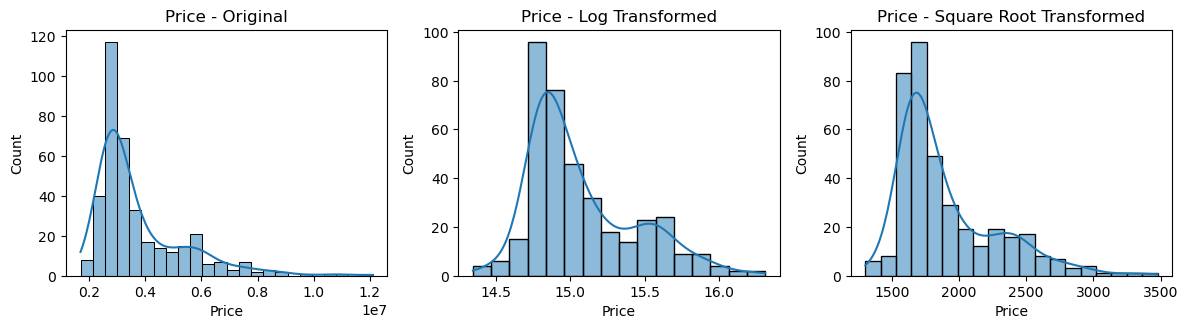

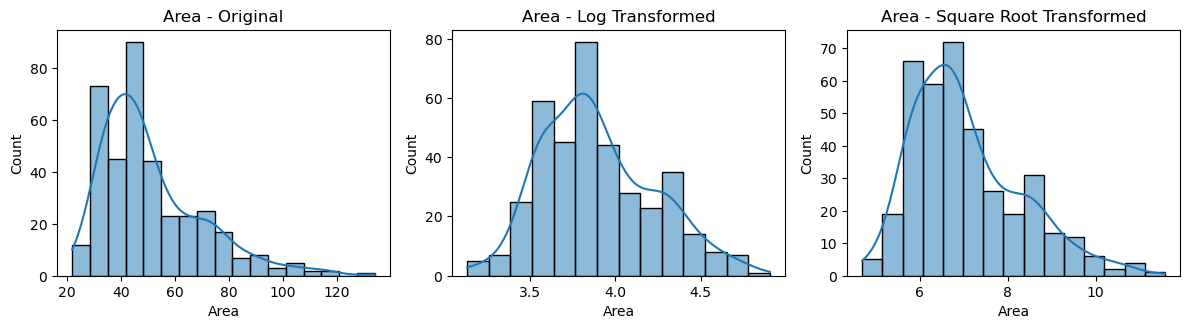

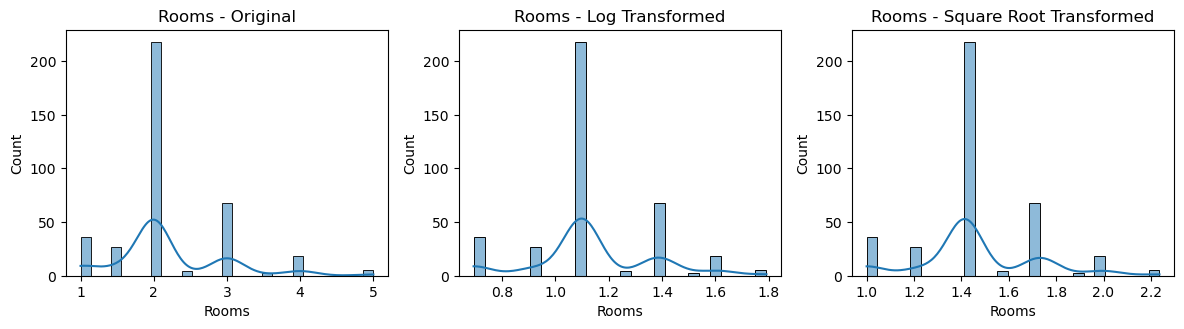

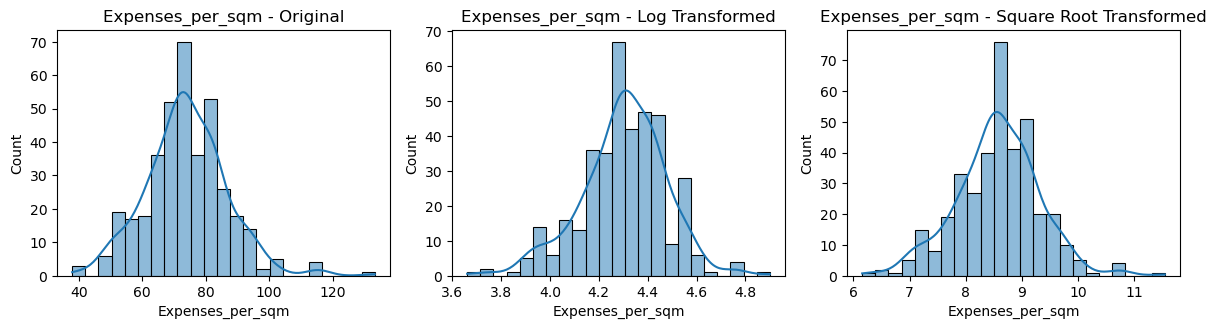

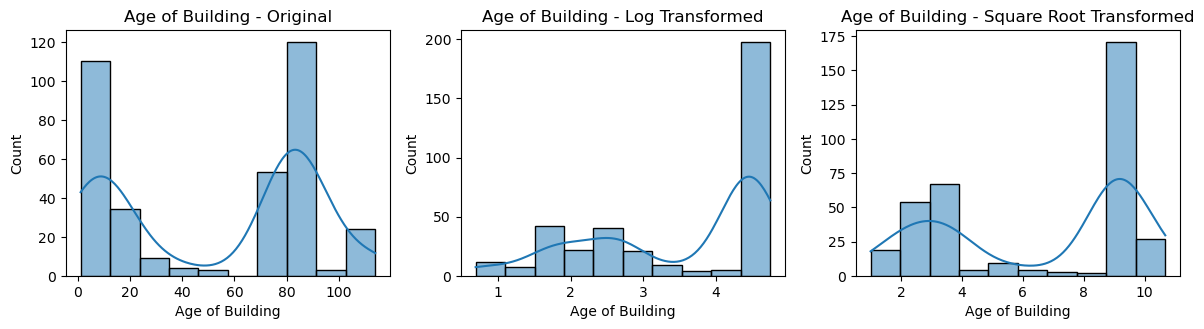

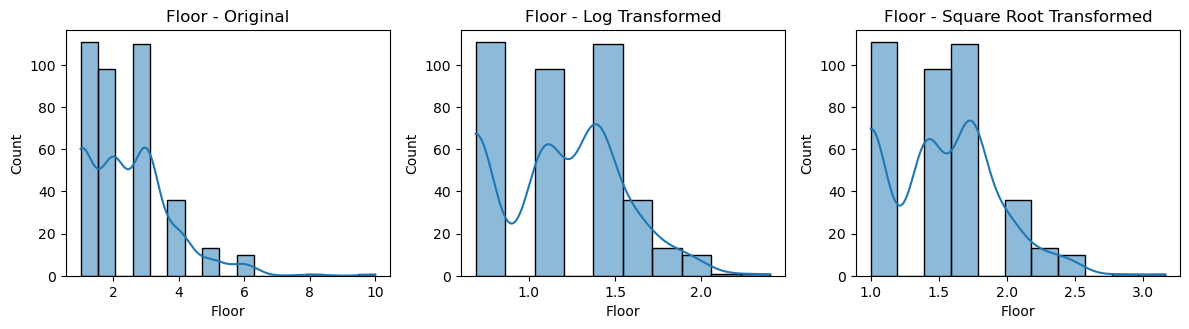

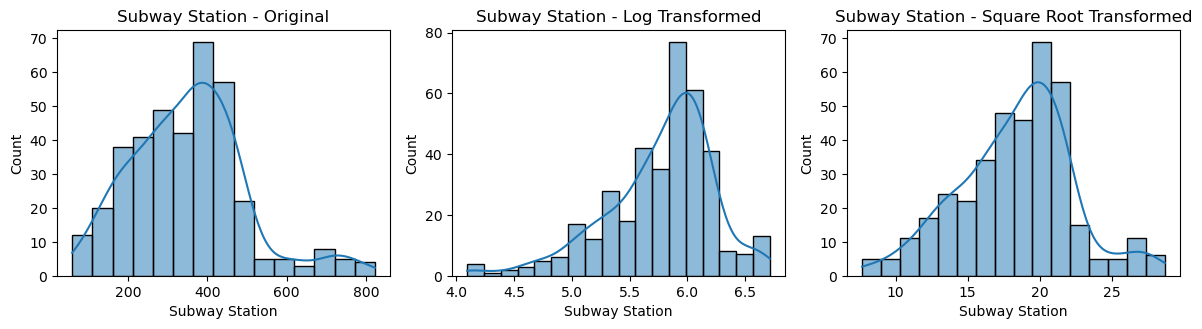

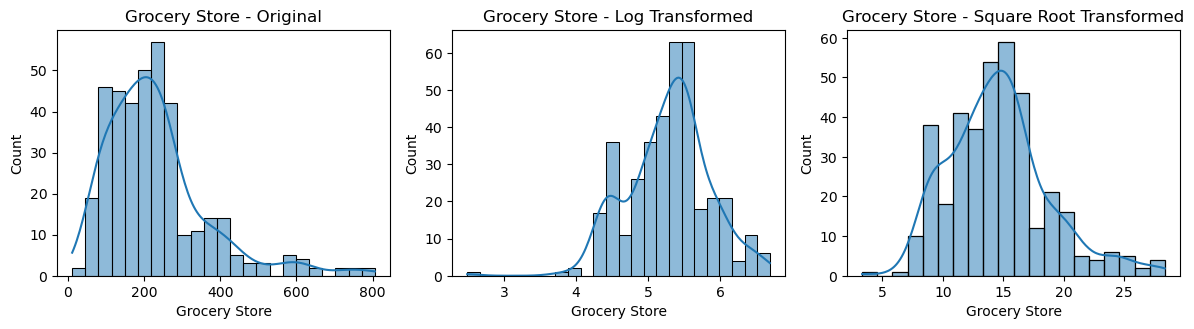

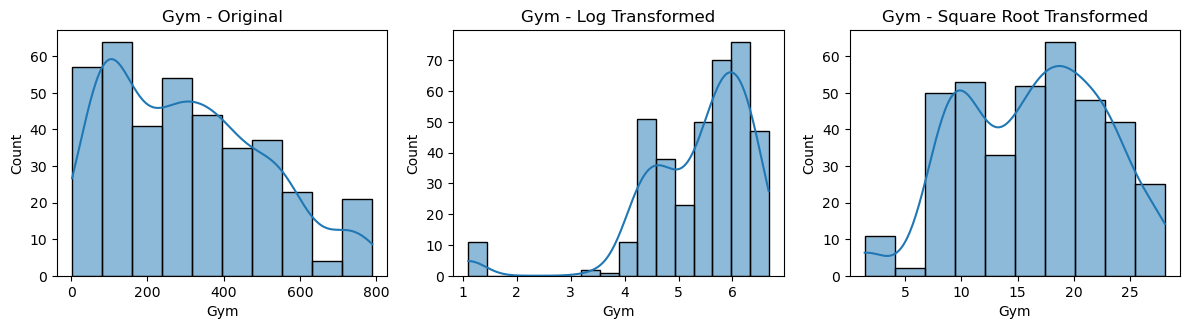

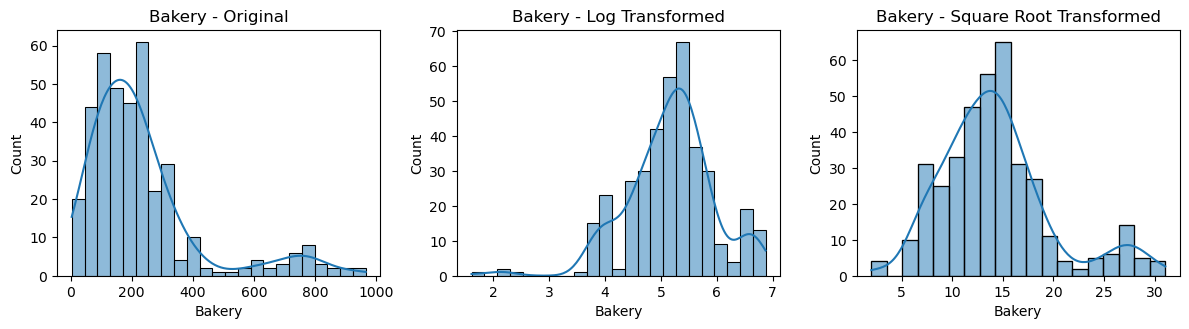

In [13]:
def plot_transformations(data, features):
    for feature in features:
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 3, 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'{feature} - Original')

        plt.subplot(2, 3, 2)
        sns.histplot(np.log1p(data[feature]), kde=True)
        plt.title(f'{feature} - Log Transformed')

        plt.subplot(2, 3, 3)
        sns.histplot(np.sqrt(data[feature]), kde=True)
        plt.title(f'{feature} - Square Root Transformed')

        plt.tight_layout()
        plt.show()

# Note that we do not transform one-hot encoded categorical features, since it skewness doesn't make sense for them 
features = ['Price', 'Area', 'Rooms', 'Expenses_per_sqm', 'Age of Building', 'Floor', 
            'Subway Station', 'Grocery Store', 'Gym', 'Bakery']
plot_transformations(df_encoded_train, features)

### 3.2 Statistical Metrics

**Skewness and Kurtosis**
<br> Measure skewness and kurtosis before and after applying the transformations. The goal is to achieve a distribution closer to normal (zero skewness and kurtosis around 3 for normal distribution).

In [14]:
def calculate_skewness_kurtosis(data, features):
    results = {}
    for feature in features:
        original_skew = skew(data[feature].dropna())
        original_kurtosis = kurtosis(data[feature].dropna())
        
        log_transformed = np.log1p(data[feature])
        sqrt_transformed = np.sqrt(data[feature])
        
        log_skew = skew(log_transformed.dropna())
        log_kurtosis = kurtosis(log_transformed.dropna())
        
        sqrt_skew = skew(sqrt_transformed.dropna())
        sqrt_kurtosis = kurtosis(sqrt_transformed.dropna())
        
        results[feature] = {
            'Original Skew': original_skew,
            'Original Kurtosis': original_kurtosis,
            'Log Skew': log_skew,
            'Log Kurtosis': log_kurtosis,
            'Sqrt Skew': sqrt_skew,
            'Sqrt Kurtosis': sqrt_kurtosis
        }
    return results

def analyze_transformations(results):
    analysis = {}
    for feature, metrics in results.items():
        # Initialize best transformation tracking
        best_skew = 'Original'
        best_kurtosis = 'Original'
        
        # Skewness analysis
        skew_values = {
            'Original': metrics['Original Skew'],
            'Log': metrics['Log Skew'],
            'Sqrt': metrics['Sqrt Skew']
        }
        min_skew = min(skew_values.values(), key=abs)
        best_skew = [k for k, v in skew_values.items() if v == min_skew][0]
        
        # Kurtosis analysis
        kurtosis_values = {
            'Original': metrics['Original Kurtosis'],
            'Log': metrics['Log Kurtosis'],
            'Sqrt': metrics['Sqrt Kurtosis']
        }
        min_kurtosis = min(kurtosis_values.values(), key=abs)
        best_kurtosis = [k for k, v in kurtosis_values.items() if v == min_kurtosis][0]
        
        # Determine overall best transformation
        if best_skew == best_kurtosis:
            best_transformation = best_skew
        else:
            # Choose based on more balanced improvement
            skew_diff = abs(metrics['Original Skew']) - abs(skew_values[best_skew])
            kurtosis_diff = abs(metrics['Original Kurtosis']) - abs(kurtosis_values[best_kurtosis])
            if skew_diff > kurtosis_diff:
                best_transformation = best_kurtosis
            else:
                best_transformation = best_skew

        analysis[feature] = {
            'Original Skew': metrics['Original Skew'],
            'Original Kurtosis': metrics['Original Kurtosis'],
            'Log Skew': metrics['Log Skew'],
            'Log Kurtosis': metrics['Log Kurtosis'],
            'Sqrt Skew': metrics['Sqrt Skew'],
            'Sqrt Kurtosis': metrics['Sqrt Kurtosis'],
            'Suggestion': best_transformation
        }
    
    return analysis

# Define your features
features = ['Price', 'Area', 'Rooms', 'Expenses_per_sqm', 'Age of Building', 'Floor', 
            'Subway Station', 'Grocery Store', 'Gym', 'Bakery']

metrics = calculate_skewness_kurtosis(df_encoded_train, features)

# Analyze transformations and determine the best
analysis = analyze_transformations(metrics)
analysis_df_encoded_train = pd.DataFrame.from_dict(analysis, orient='index')

In [15]:
analysis_df_encoded_train

,Original Skew,Original Kurtosis,Log Skew,Log Kurtosis,Sqrt Skew,Sqrt Kurtosis,Suggestion
Price,1.854880,3.926520,0.986224,0.341818,1.378075,1.610119,Log
Area,1.294323,1.691344,0.475531,-0.182543,0.866476,0.447442,Log
Rooms,1.088002,1.795334,0.238541,0.556633,0.464988,0.779098,Log
Expenses_per_sqm,0.404680,1.475589,-0.346568,0.895927,0.014307,0.927868,Sqrt
Age of Building,-0.172091,-1.689628,-0.691630,-0.968324,-0.370874,-1.600432,Original
Floor,1.240238,3.012600,0.197024,-0.650602,0.448569,-0.029737,Log
Subway Station,0.609470,0.808968,-0.881491,1.163233,-0.110077,0.216279,Sqrt
Grocery Store,1.599199,3.305643,-0.309521,1.007633,0.698316,0.784795,Log
Gym,0.505477,-0.647426,-1.936347,5.482694,-0.182868,-0.675698,Original
Bakery,1.909688,3.443997,-0.562676,1.971770,0.951439,1.043587,Log


**Comment**
<br> First, while it's not normal to transform y_train (`Price`), the Skew and Kurtosis are quite extreme since we have few high `Price` apartments in our dataset. 
<br> Secondly, we can see that it is recommended that we transform some features in different ways, but not all.
<br> One problem we have with `Age of Building` is that it exhibit a bimodal distribution. This is problematic for the modeling.
<br> Either we split the dataset up in two dataset, one `Old` and one `New`, or we may look to transform it or get rid of it.
<br> Let's first transform and examine *multicollinearity* with an VIF analysis to see if we get more answers.

## 4. Transformation

Here we will transform the test set in an equal way as we do for the training set, from the analysis result for the train set.

In [16]:
# Lists of columns to be transformed
log_columns = ['Price', 'Area', 'Rooms', 'Floor', 'Grocery Store', 'Bakery']     # Columns to transform with log
sqrt_columns = ['Expenses_per_sqm', 'Subway Station']    # Columns to transform with sqrt

# Automatically determine the original columns (i.e., not transformed)
original_columns = df_encoded_train.columns.difference(log_columns + sqrt_columns)

# Initialize empty DataFrames for transformed data
df_transformed_train = pd.DataFrame()
df_transformed_test = pd.DataFrame()

# Apply log transformation
for col in log_columns:
    df_transformed_train[col + '_log'] = np.log(df_encoded_train[col])
    df_transformed_test[col + '_log'] = np.log(df_encoded_test[col])

# Apply square root transformation
for col in sqrt_columns:
    df_transformed_train[col + '_sqrt'] = np.sqrt(df_encoded_train[col])
    df_transformed_test[col + '_sqrt'] = np.sqrt(df_encoded_test[col])

# Keep original columns
df_transformed_train[original_columns] = df_encoded_train[original_columns]
df_transformed_test[original_columns] = df_encoded_test[original_columns]

In [17]:
df_transformed_train.head()

,Price_log,Area_log,Rooms_log,Floor_log,Grocery Store_log,Bakery_log,Expenses_per_sqm_sqrt,Subway Station_sqrt,Address,Age of Building,Balcony,District_Hökmossen,District_Hökmossen_Floor_Lo,District_LM-Staden,District_LM-Staden_Floor_Lo,District_Midsommarkransen,District_Midsommarkransen_Floor_Hi,District_Midsommarkransen_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Telefonplan,District_Telefonplan_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid,Elevator,Fireplace,Floor_Category_Lo,Floor_Category_Mid,Gym,Latitude,Longitude,Patio
0,15.377857,4.290459,1.098612,1.609438,5.996452,5.068904,8.360921,21.330729,Tellusgången 34,9.0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,208,59.298699,17.989062,0
1,14.771022,4.043051,0.693147,1.098612,6.364751,6.637258,8.682509,26.324893,Tångvägen 31,80.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,553,59.292110,17.994688,0
2,15.135932,3.931826,1.098612,0.000000,5.463832,4.859812,9.166221,17.349352,Cedergrensvägen 43,84.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,345,59.300796,17.998543,0
3,14.830741,3.828641,0.693147,1.098612,4.234107,5.468060,8.266822,19.493589,Responsgatan 12,5.0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,96,59.296459,18.002712,0
4,15.297115,4.110874,0.693147,1.386294,4.653960,5.545177,7.762879,14.696938,Mikrofonvägen 21,14.0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,233,59.296911,17.999793,0


In [18]:
df_transformed_test.head()

,Price_log,Area_log,Rooms_log,Floor_log,Grocery Store_log,Bakery_log,Expenses_per_sqm_sqrt,Subway Station_sqrt,Address,Age of Building,Balcony,District_Hökmossen,District_Hökmossen_Floor_Lo,District_LM-Staden,District_LM-Staden_Floor_Lo,District_Midsommarkransen,District_Midsommarkransen_Floor_Hi,District_Midsommarkransen_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Telefonplan,District_Telefonplan_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid,Elevator,Fireplace,Floor_Category_Lo,Floor_Category_Mid,Gym,Latitude,Longitude,Patio
0,15.581952,4.454347,1.098612,1.609438,5.899897,5.298317,8.229979,22.271057,Mobilgatan 5,11.0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,244,59.298680,17.988331,0
1,14.648420,3.688879,0.693147,0.693147,6.582025,6.738152,8.583414,28.565714,Hökmossevägen 36,84.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,521,59.291235,17.992667,0
2,14.869823,3.761200,0.693147,0.693147,5.739793,6.280396,7.950428,20.248457,Borrvägen 3,80.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,366,59.294561,17.997780,0
3,15.274126,4.110874,0.693147,1.609438,6.021023,4.836282,8.486247,20.615528,Tellusgången 32,9.0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,174,59.298818,17.989620,0
4,15.110238,3.931826,0.693147,1.098612,4.997212,5.111988,9.166221,13.784049,Valborgsmässovägen 21,NaN,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,254,59.299551,17.999085,0


In [19]:
print(df_transformed_train.shape)
print(df_transformed_test.shape)

(380, 31)
(95, 31)


Looks good.

In [20]:
# Reorder columns
new_column_order = [
    'Address', 'Price_log', 'Area_log', 'Rooms_log', 'Expenses_per_sqm_sqrt', 'Age of Building', 
    'Floor_log', 'Subway Station_sqrt', 'Grocery Store_log', 'Gym', 'Bakery_log', 'Latitude', 'Longitude',
    'Elevator', 'Balcony', 'Patio', 'Fireplace', 
    'District_Hökmossen', 'District_LM-Staden', 'District_Midsommarkransen', 'District_Telefonplan',
    'Floor_Category_Lo', 'Floor_Category_Mid',
    'District_Hökmossen_Floor_Lo', 'District_LM-Staden_Floor_Lo', 
    'District_Midsommarkransen_Floor_Lo', 'District_Midsommarkransen_Floor_Mid', 'District_Midsommarkransen_Floor_Hi',
    'District_Telefonplan_Floor_Lo', 'District_Telefonplan_Floor_Mid', 'District_Telefonplan_Floor_Hi'
]

df_transformed_train = df_transformed_train[new_column_order]
df_transformed_test = df_transformed_test[new_column_order]

In [21]:
df_transformed_train.head()

,Address,Price_log,Area_log,Rooms_log,Expenses_per_sqm_sqrt,Age of Building,Floor_log,Subway Station_sqrt,Grocery Store_log,Gym,Bakery_log,Latitude,Longitude,Elevator,Balcony,Patio,Fireplace,District_Hökmossen,District_LM-Staden,District_Midsommarkransen,District_Telefonplan,Floor_Category_Lo,Floor_Category_Mid,District_Hökmossen_Floor_Lo,District_LM-Staden_Floor_Lo,District_Midsommarkransen_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Midsommarkransen_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid,District_Telefonplan_Floor_Hi
0,Tellusgången 34,15.377857,4.290459,1.098612,8.360921,9.0,1.609438,21.330729,5.996452,208,5.068904,59.298699,17.989062,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,Tångvägen 31,14.771022,4.043051,0.693147,8.682509,80.0,1.098612,26.324893,6.364751,553,6.637258,59.292110,17.994688,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
2,Cedergrensvägen 43,15.135932,3.931826,1.098612,9.166221,84.0,0.000000,17.349352,5.463832,345,4.859812,59.300796,17.998543,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
3,Responsgatan 12,14.830741,3.828641,0.693147,8.266822,5.0,1.098612,19.493589,4.234107,96,5.468060,59.296459,18.002712,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,Mikrofonvägen 21,15.297115,4.110874,0.693147,7.762879,14.0,1.386294,14.696938,4.653960,233,5.545177,59.296911,17.999793,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


## 5. Multicollinearity

### 5.1 Correlation

We have previously identified the risk for multicollinearity. 
<br> We will now make a more through analysis and then address it.
<br> To identify possible multicollinearity, we will use both df.corr() and VIF (Variance Inflation Factor).

In [22]:
df_transformed_train.columns

Index(['Address', 'Price_log', 'Area_log', 'Rooms_log',
       'Expenses_per_sqm_sqrt', 'Age of Building', 'Floor_log',
       'Subway Station_sqrt', 'Grocery Store_log', 'Gym', 'Bakery_log',
       'Latitude', 'Longitude', 'Elevator', 'Balcony', 'Patio', 'Fireplace',
       'District_Hökmossen', 'District_LM-Staden', 'District_Midsommarkransen',
       'District_Telefonplan', 'Floor_Category_Lo', 'Floor_Category_Mid',
       'District_Hökmossen_Floor_Lo', 'District_LM-Staden_Floor_Lo',
       'District_Midsommarkransen_Floor_Lo',
       'District_Midsommarkransen_Floor_Mid',
       'District_Midsommarkransen_Floor_Hi', 'District_Telefonplan_Floor_Lo',
       'District_Telefonplan_Floor_Mid', 'District_Telefonplan_Floor_Hi'],
      dtype='object')

In [23]:
# Selecting numerical columns
numerical_cols = df_transformed_train.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numerical columns
corr_matrix = round(df_transformed_train[numerical_cols].corr(),2)
price_log_corr = corr_matrix['Price_log'].sort_values(ascending=False)

In [24]:
price_log_corr

Price_log                              1.00
Area_log                               0.90
Rooms_log                              0.76
Fireplace                              0.37
Latitude                               0.31
Elevator                               0.16
District_Midsommarkransen_Floor_Lo     0.12
District_Midsommarkransen              0.11
Longitude                              0.10
Age of Building                        0.09
Gym                                    0.08
Balcony                                0.08
District_Telefonplan_Floor_Mid         0.06
Floor_Category_Mid                     0.05
District_Midsommarkransen_Floor_Mid   -0.01
District_Telefonplan                  -0.01
District_Telefonplan_Floor_Hi         -0.02
Patio                                 -0.02
Floor_log                             -0.03
Floor_Category_Lo                     -0.03
Grocery Store_log                     -0.03
District_Midsommarkransen_Floor_Hi    -0.04
District_Telefonplan_Floor_Lo   

**Comment**
- We can see that it seems as if `Area` and `Rooms` are strongly correlated to `Price`.
- `Fireplace`, `Latitude`, and `Expenses per sqm` are all moderately correlated to `Price`.

Let's look at a correlation heatmap.

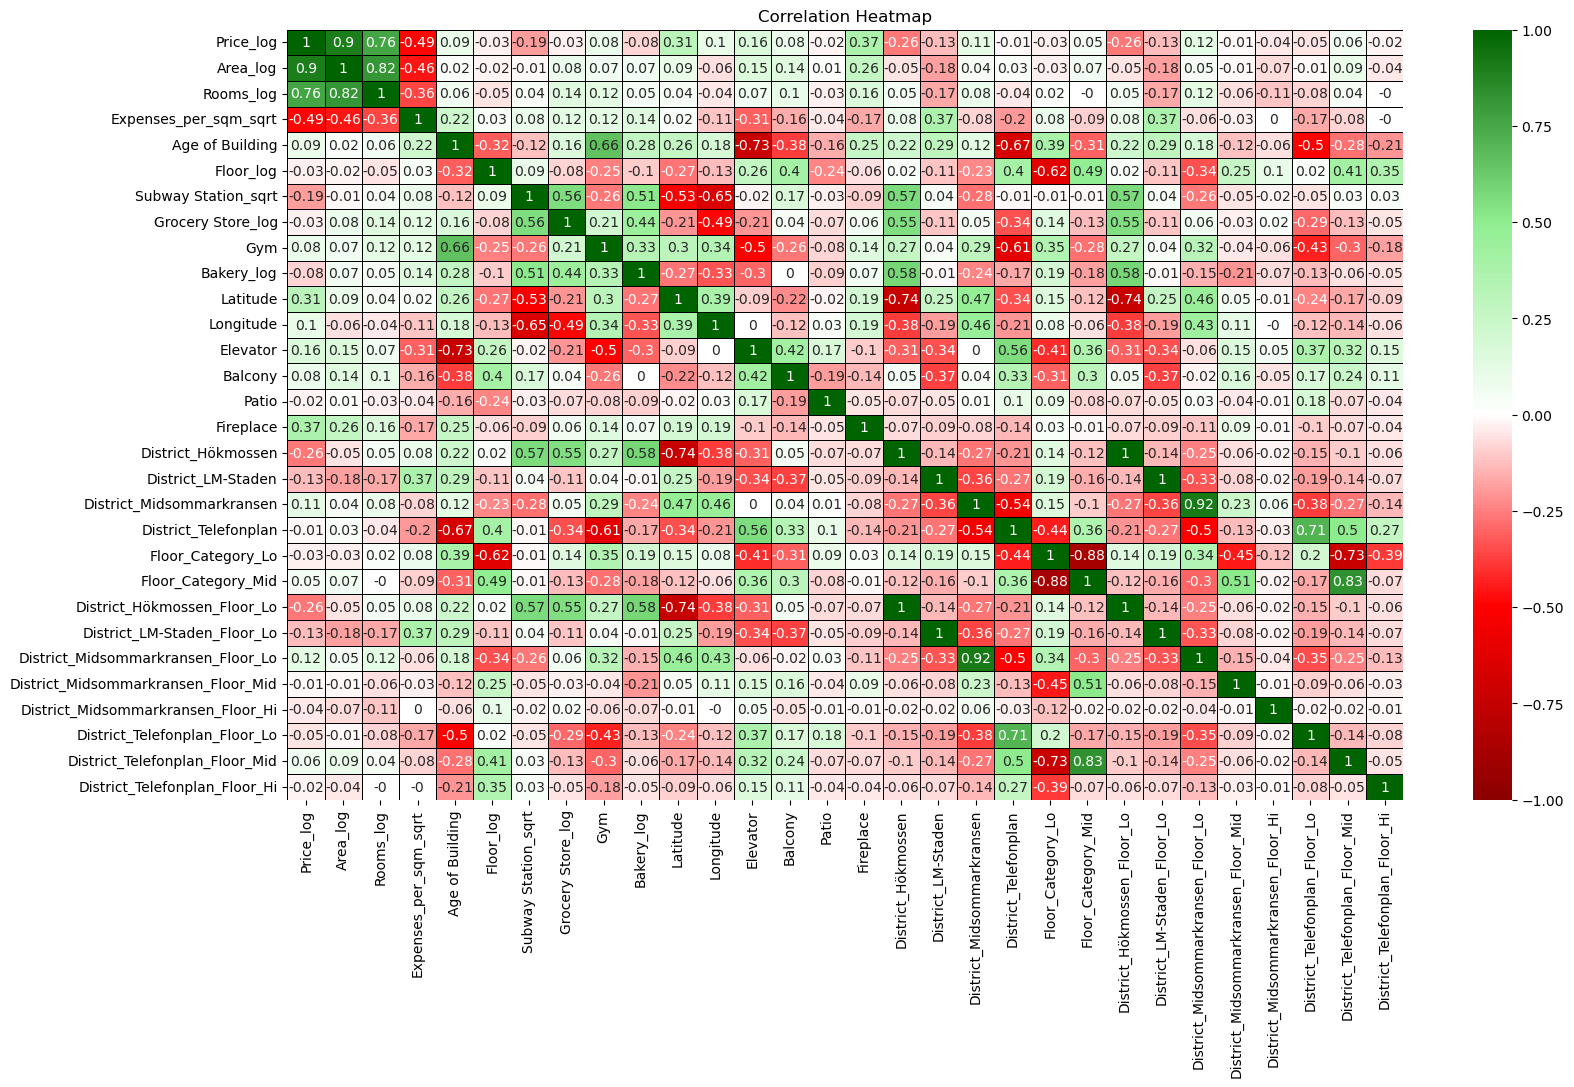

In [25]:
# Define a custom colormap from red (negative) to white (neutral) to green (positive)
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['darkred', 'red', 'white', 'lightgreen', 'darkgreen'],
    N=512  # Increased number of colors for smoother transitions
)

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

**Comment**
<br> If we have an |r| > 0.8 or 0.9, they are deemed to be highly correlated.

<br> *Price, Area and Rooms*
<br> We can see that we have a high correlation between all the selected features, such as `Price` vs `Area` vs `Rooms`.
<br> This is to be expected, since `Price` is known to be highly correlated with `Area`, and the larger `Area` usually results in more `Rooms` (or the other way around).

<br> *Expenses_per_sqm*
<br> Looking at `Expenses_per_sqm`, it is moderately negatively correlated to `Price`. This is expected, since the higher the monthly expenses are the less attractive an apartment will be due to a higher monthly fee.
<br> I am a bit surprised to the same correlation with `Area` suggesting that a smaller `Living Area` of an apartment would have an effect of increasing the `Expenses_per_sqm`. 
<br> But the correct way to interpret it is that it is due to the dominating effect of the correltation between `Price` and `Living Area` will also effect this correlation.
<br> Same thing for `Rooms`.

<br> *Age of Building and Gym*
<br> Other notable correlations are `Age of Building` and `Gym` of +0.66, which is indicative of `Gyms` being far away from the older apartments in the `District` 'Gamla Midsommarkransen'. 
<br> We can see that there's a strong negative correaltion of -0.61 between the `District` 'Telefonplan' and `Gyms` indicating that `Gyms` are close to this area, which is also negatively correlated to `Age of Building`, i.e. there are newer apartments in the `District`'Telefonplan'. 

<br> *Amenities*
<br> Also, we can see that it seems as if `Subway Station`, `Grocery Store` and `Bakery` are moderately positively correlated, which may be explained due to them being located in `District` centers, while `Gym` is independent of this.
<br> Furthermore, we can also see that the `District` 'Hökmossen' is quite far away from amenities such as `Subway Station`, `Grocery Store` and `Bakery`, and somewhat to `Gym`.

<br> *Districts*
<br> Also, note that `District_Hökmossen` and `District_Hökmossen_Floor_Lo` are perfectly correlated (same for 'LM-Staden'). 
<br> Thus we have redundant information and can safely *drop* the features `District_Hökmossen_Floor_Lo` and `District_LM-Staden_Floor_Lo`.
<br> We have a similar situation with `District_Midsommarkransen_Floor_Lo` and `District_Midsommarkransen` since most apartments are located in low-rise buildings.
<br> So, due to a very high correlation they capture amlost the same correlations with other features, make it a bit redundant to keep both features.
<br> Thus, I will consider removing `District_Midsommarkransen_Floor_Lo`.

<br> *Floor_Categories*
<br> Finally, we can see that `Floor_Category_Mid` and `Floor_Category_Lo` have a correlation of -0.88, suggesting that when one is present, the other one isn't. 
<br> That should be the case as we have few in the category `Floor_Category_Mid`. 
<br> Thus, me may consider removing both since they already were used to create the new features `District_Name_ Floor_Level`.

**In Summary**

- Remove `Districts` and `Floor_Category`, while keeping the newly created features `District_Name_Floor_Level` makes sense.
- Examine `Price`, `Area`, `Rooms` and `Expenses_per_sqm` further.

### 5.2 VIF

In [26]:
df_transformed_train.head()

,Address,Price_log,Area_log,Rooms_log,Expenses_per_sqm_sqrt,Age of Building,Floor_log,Subway Station_sqrt,Grocery Store_log,Gym,Bakery_log,Latitude,Longitude,Elevator,Balcony,Patio,Fireplace,District_Hökmossen,District_LM-Staden,District_Midsommarkransen,District_Telefonplan,Floor_Category_Lo,Floor_Category_Mid,District_Hökmossen_Floor_Lo,District_LM-Staden_Floor_Lo,District_Midsommarkransen_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Midsommarkransen_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid,District_Telefonplan_Floor_Hi
0,Tellusgången 34,15.377857,4.290459,1.098612,8.360921,9.0,1.609438,21.330729,5.996452,208,5.068904,59.298699,17.989062,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,Tångvägen 31,14.771022,4.043051,0.693147,8.682509,80.0,1.098612,26.324893,6.364751,553,6.637258,59.292110,17.994688,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
2,Cedergrensvägen 43,15.135932,3.931826,1.098612,9.166221,84.0,0.000000,17.349352,5.463832,345,4.859812,59.300796,17.998543,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
3,Responsgatan 12,14.830741,3.828641,0.693147,8.266822,5.0,1.098612,19.493589,4.234107,96,5.468060,59.296459,18.002712,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,Mikrofonvägen 21,15.297115,4.110874,0.693147,7.762879,14.0,1.386294,14.696938,4.653960,233,5.545177,59.296911,17.999793,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


Since we have a couple of missing values in some features, we'll need to temporarily remove those rows before running a VIF analysis (require no NaN-values present).
<br> Let's see what features have NaN values.

In [27]:
print(df_transformed_train.isna().sum())

Address                                 0
Price_log                               0
Area_log                                0
Rooms_log                               1
Expenses_per_sqm_sqrt                   0
Age of Building                        20
Floor_log                               0
Subway Station_sqrt                     0
Grocery Store_log                       0
Gym                                     0
Bakery_log                              0
Latitude                                0
Longitude                               0
Elevator                                0
Balcony                                 0
Patio                                   0
Fireplace                               0
District_Hökmossen                      0
District_LM-Staden                      0
District_Midsommarkransen               0
District_Telefonplan                    0
Floor_Category_Lo                       0
Floor_Category_Mid                      0
District_Hökmossen_Floor_Lo       

In [28]:
# Create a new DataFrame df_vif by dropping rows with NaN values from df_transformed
df_vif = df_transformed_train.dropna()

# Verify that df_vif does not contain any NaN values
print(df_vif.isna().sum())

Address                                0
Price_log                              0
Area_log                               0
Rooms_log                              0
Expenses_per_sqm_sqrt                  0
Age of Building                        0
Floor_log                              0
Subway Station_sqrt                    0
Grocery Store_log                      0
Gym                                    0
Bakery_log                             0
Latitude                               0
Longitude                              0
Elevator                               0
Balcony                                0
Patio                                  0
Fireplace                              0
District_Hökmossen                     0
District_LM-Staden                     0
District_Midsommarkransen              0
District_Telefonplan                   0
Floor_Category_Lo                      0
Floor_Category_Mid                     0
District_Hökmossen_Floor_Lo            0
District_LM-Stad

In [29]:
def calculate_vif(df, exclude_columns=None):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame,
    excluding specified columns.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the features to analyze.
    exclude_columns (list): List of column names to exclude from VIF calculation.

    Returns:
    pd.DataFrame: DataFrame with VIF values for each feature, sorted by VIF in descending order.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Drop specified columns that should not be included in VIF calculation
    df_filtered = df.drop(columns=exclude_columns, errors='ignore')
    
    # Add a constant term to the DataFrame (intercept term for the VIF calculation)
    df_with_const = add_constant(df_filtered)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) 
                       for i in range(df_with_const.shape[1])]
    
    # Remove the constant term VIF value (intercept term)
    vif_data = vif_data[vif_data["Feature"] != "const"]
    
    # Sort the DataFrame by VIF in descending order
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_data

# Specify the columns to exclude from VIF calculation
exclude_columns = ['Address', 'Latitude', 'Longitude', 'District_LM-Staden', 'District_Hökmossen']

# Calculate VIF for the features in df_transformed_old
vif_df = calculate_vif(df_vif, exclude_columns=exclude_columns)
print(vif_df)

                                Feature        VIF
0         District_Telefonplan_Floor_Hi        inf
1             District_Midsommarkransen        inf
2        District_Telefonplan_Floor_Mid        inf
3         District_Telefonplan_Floor_Lo        inf
4    District_Midsommarkransen_Floor_Hi        inf
5   District_Midsommarkransen_Floor_Mid        inf
6    District_Midsommarkransen_Floor_Lo        inf
7                    Floor_Category_Mid        inf
8                     Floor_Category_Lo        inf
9                  District_Telefonplan        inf
10                            Price_log  10.856920
11                             Area_log   9.487050
12          District_LM-Staden_Floor_Lo   8.043981
13          District_Hökmossen_Floor_Lo   7.043110
14                      Age of Building   4.095467
15                            Rooms_log   3.840568
16                  Subway Station_sqrt   3.770410
17                                  Gym   3.562670
18                             

C:\Users\gustm\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\gustm\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


**Comment**
<br> The presence of inf (infinity) in the VIF values indicates severe multicollinearity among the features. 
<br> When VIF values are extremely high or infinite, it typically means that there is perfect or near-perfect multicollinearity, where one or more features are highly correlated with one another.

And this is expected, so here we need to remove `Floor_Category` and `Districts`.

In [30]:
df_vif = df_vif.drop(columns=['Floor_Category_Lo', 'Floor_Category_Mid', 'District_Midsommarkransen', 'District_Hökmossen', 'District_LM-Staden', 'District_Telefonplan'])

In [31]:
def calculate_vif(df, exclude_columns=None):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame,
    excluding specified columns.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the features to analyze.
    exclude_columns (list): List of column names to exclude from VIF calculation.

    Returns:
    pd.DataFrame: DataFrame with VIF values for each feature, sorted by VIF in descending order.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Drop specified columns that should not be included in VIF calculation
    df_filtered = df.drop(columns=exclude_columns, errors='ignore')
    
    # Add a constant term to the DataFrame (intercept term for the VIF calculation)
    df_with_const = add_constant(df_filtered)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) 
                       for i in range(df_with_const.shape[1])]
    
    # Remove the constant term VIF value (intercept term)
    vif_data = vif_data[vif_data["Feature"] != "const"]
    
    # Sort the DataFrame by VIF in descending order
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_data

# Specify the columns to exclude from VIF calculation
exclude_columns = ['Address', 'Latitude', 'Longitude']

# Calculate VIF for the features in df_transformed_old
vif_df = calculate_vif(df_vif, exclude_columns=exclude_columns)
print(vif_df)

                                Feature        VIF
0    District_Midsommarkransen_Floor_Lo  13.498825
1         District_Telefonplan_Floor_Lo  11.380610
2                             Price_log  10.856920
3                              Area_log   9.487050
4           District_LM-Staden_Floor_Lo   8.043981
5        District_Telefonplan_Floor_Mid   7.725113
6           District_Hökmossen_Floor_Lo   7.043110
7                       Age of Building   4.095467
8                             Rooms_log   3.840568
9                   Subway Station_sqrt   3.770410
10        District_Telefonplan_Floor_Hi   3.650410
11  District_Midsommarkransen_Floor_Mid   3.580824
12                                  Gym   3.562670
13                             Elevator   2.893002
14                           Bakery_log   2.528414
15                            Fireplace   2.439717
16                            Floor_log   2.253795
17                    Grocery Store_log   2.154412
18                             

**Comment**
-  A lot better. However, we still have high values for the low-rise buildings.
-  Let's look at an updated correlation heatmap for df_vif 

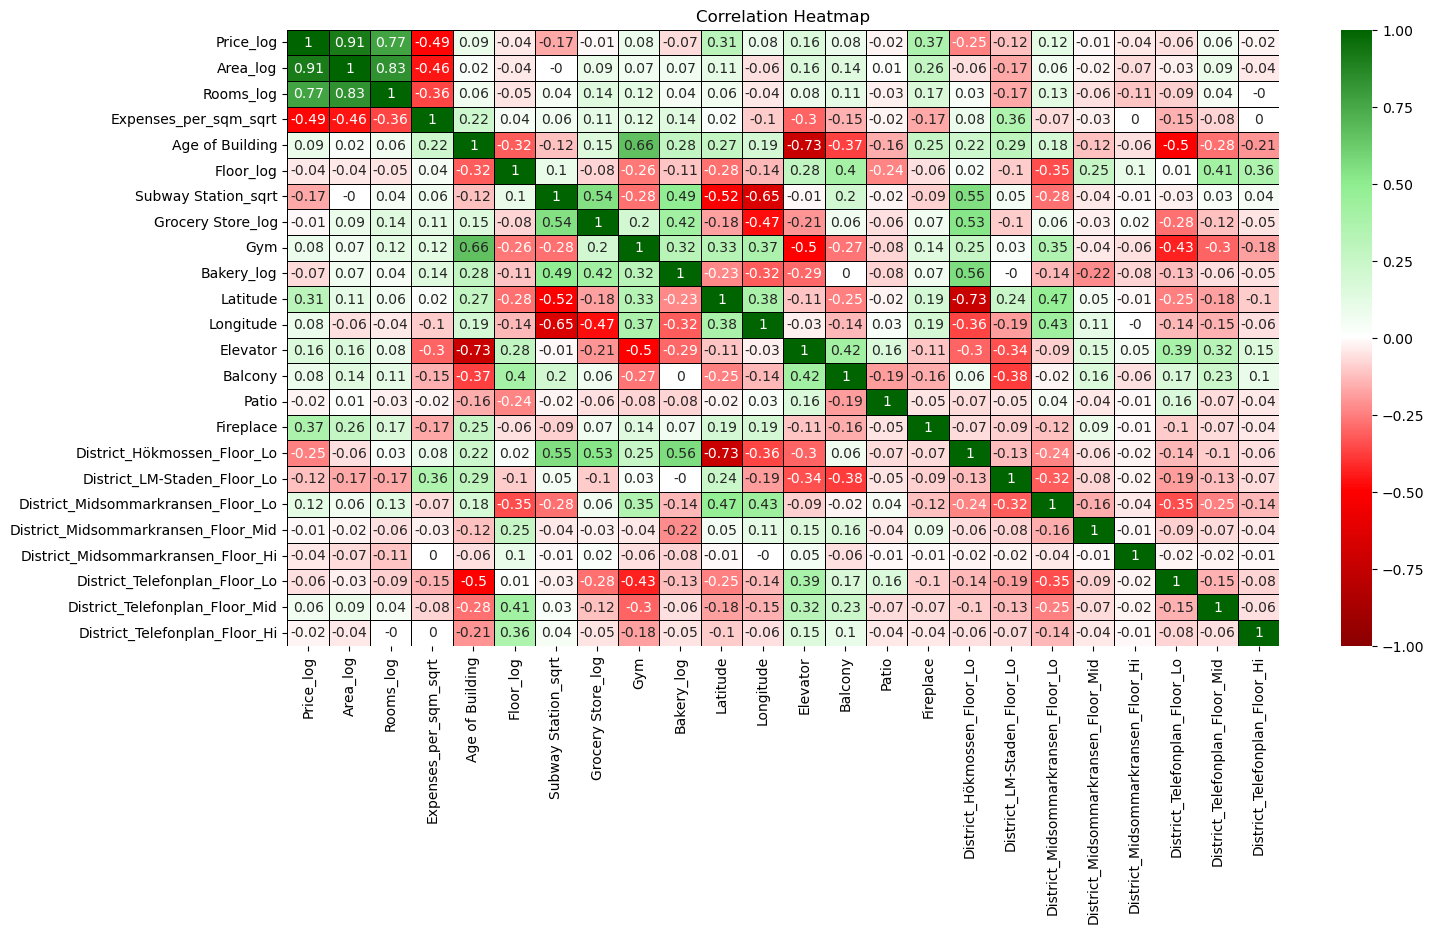

In [32]:
numerical_cols = df_vif.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numerical columns
corr_matrix = round(df_vif[numerical_cols].corr(),2)

# Define a custom colormap from red (negative) to white (neutral) to green (positive)
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['darkred', 'red', 'white', 'lightgreen', 'darkgreen'],
    N=512  # Increased number of colors for smoother transitions
)

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

**Comment**
<br> I can't see any obvious correlation problems with `District_Midsommarkransen_Floor_Lo` and `District_Telefonplan_Floor_Lo`, but we have high values of VIF for all the new features.
<br> Let's begin by taking a look at the strongly correlated features `Price`, `Area`, and `Rooms`, and to some degree, `Espenses_per_sqm` and see if this can solve some things.

As has been noted before, `Area` is naturally a strong predictor of `Price` and should stay so. 
<br> `Expenses_per_sqm` has already been decoupled from `Area` by dividing `Monthly Fee` with `Area`. 
<br> That leaves `Rooms`. I will remove this feature, since it doesn't contribute much. 
<br> Some people, e.g. families, will favour an increase of `Rooms` while other people, e.g. singles and childless couples, may perfer less `Rooms`, i.e. larger areas in existing `Rooms`.
<br> Also, `Floor` should be removed as this information has been used to create the new features.

But let's start be removing the feature at the top of the VIF-analysis first. We'll exclude it in the analysis code.

In [33]:
def calculate_vif(df, exclude_columns=None):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame,
    excluding specified columns.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the features to analyze.
    exclude_columns (list): List of column names to exclude from VIF calculation.

    Returns:
    pd.DataFrame: DataFrame with VIF values for each feature, sorted by VIF in descending order.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Drop specified columns that should not be included in VIF calculation
    df_filtered = df.drop(columns=exclude_columns, errors='ignore')
    
    # Add a constant term to the DataFrame (intercept term for the VIF calculation)
    df_with_const = add_constant(df_filtered)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) 
                       for i in range(df_with_const.shape[1])]
    
    # Remove the constant term VIF value (intercept term)
    vif_data = vif_data[vif_data["Feature"] != "const"]
    
    # Sort the DataFrame by VIF in descending order
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_data

# Specify the columns to exclude from VIF calculation
exclude_columns = ['Address', 'Latitude', 'Longitude', 'District_Midsommarkransen_Floor_Lo', 'Rooms_log', 'Age of Building', 'Floor_log']

# Calculate VIF for the features in df_transformed_old
vif_df = round(calculate_vif(df_vif, exclude_columns=exclude_columns), 2)
print(vif_df)

                                Feature   VIF
0                             Price_log  9.47
1                              Area_log  7.87
2                   Subway Station_sqrt  3.54
3                                   Gym  3.19
4           District_Hökmossen_Floor_Lo  2.62
5                              Elevator  2.28
6                            Bakery_log  2.24
7         District_Telefonplan_Floor_Lo  2.18
8                     Grocery Store_log  2.06
9           District_LM-Staden_Floor_Lo  1.74
10       District_Telefonplan_Floor_Mid  1.73
11                              Balcony  1.68
12                Expenses_per_sqm_sqrt  1.66
13                            Fireplace  1.39
14  District_Midsommarkransen_Floor_Mid  1.26
15        District_Telefonplan_Floor_Hi  1.24
16                                Patio  1.18
17   District_Midsommarkransen_Floor_Hi  1.05


**Comment**
- We can see that we have improved the VIF table after having removed both `Rooms` and `Age of Building` according to prior discussions.
- We may want to include and exclude various features in modeling to see how accuracy behaves when reducing complexity (potentially losing information) while reducing multicollinearity.

Let's run a correlation heatmap again.

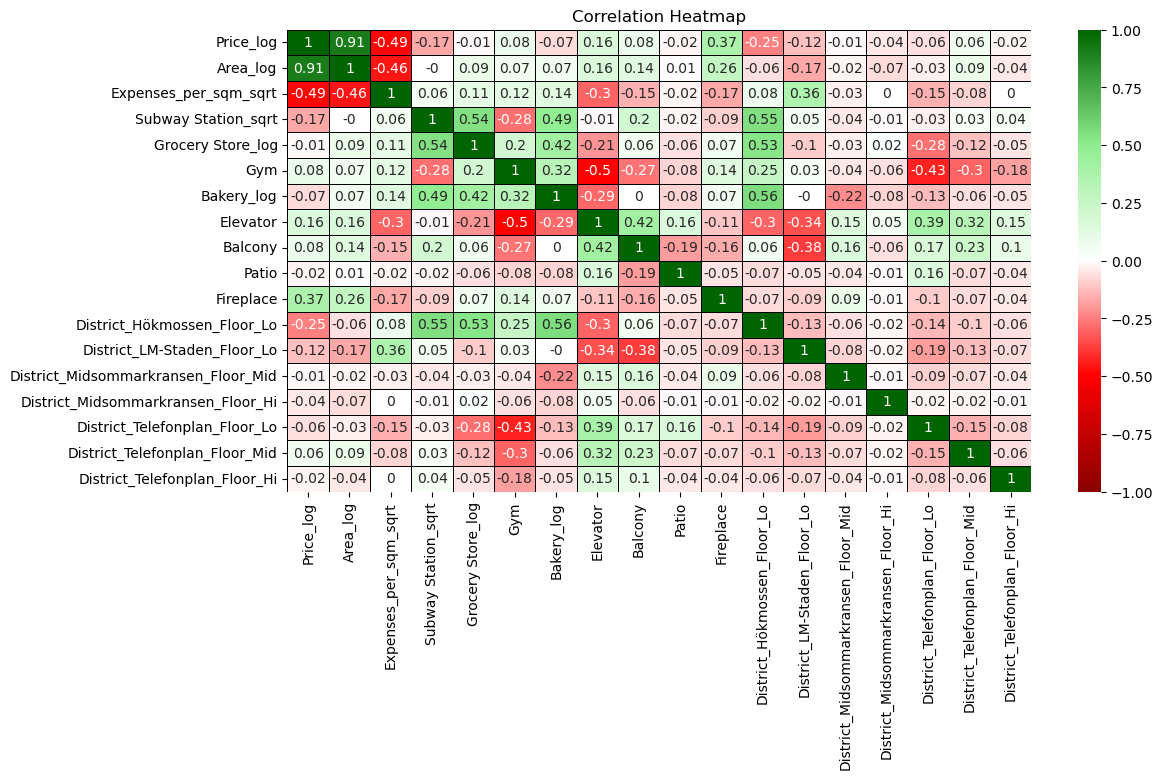

In [34]:
exclude_columns = ['Address', 'Latitude', 'Longitude', 'District_Midsommarkransen_Floor_Lo', 'Rooms_log', 'Floor_log', 'Age of Building']

# Drop specified columns that should not be included in VIF calculation
df_filtered = df_vif.drop(columns=exclude_columns, errors='ignore')

numerical_cols = df_filtered.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numerical columns
corr_matrix = round(df_filtered[numerical_cols].corr(),2)

# Define a custom colormap from red (negative) to white (neutral) to green (positive)
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['darkred', 'red', 'white', 'lightgreen', 'darkgreen'],
    N=512  # Increased number of colors for smoother transitions
)

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

**Comment**
<br> Both VIF table and the correlation heatmap has improved significantly. We can now proceed.

### 5.3 Preprocessing Train and Test sets

In our analysis of multicollinearity, we were able to identify the need for dropping the following features:
- `Floor_Category_Lo`
- `Floor_Category_Mid`
- `District_Midsommarkransen`
- `District_Hökmossen`
- `District_LM-Staden`
- `District_Telefonplan`
- `District_Midsommarkransen_Floor_Lo`
- `Rooms_log`
- `Age of Building`
- `Floor_log`

We will also drop the columns `Address`, `Latitude`, `Longitude` as they are not needed beyond this step.

In [35]:
df_transformed_train = df_transformed_train.drop(columns=[
    'Floor_Category_Lo', 'Floor_Category_Mid', 'District_Midsommarkransen', 'District_Hökmossen', 'District_LM-Staden', 'District_Telefonplan',
    'Address', 'Latitude', 'Longitude', 'District_Midsommarkransen_Floor_Lo', 'Rooms_log', 'Age of Building', 'Floor_log'
])

df_transformed_test = df_transformed_test.drop(columns=[
    'Floor_Category_Lo', 'Floor_Category_Mid', 'District_Midsommarkransen', 'District_Hökmossen', 'District_LM-Staden', 'District_Telefonplan',
    'Address', 'Latitude', 'Longitude', 'District_Midsommarkransen_Floor_Lo', 'Rooms_log', 'Age of Building', 'Floor_log'
])

We will now check if we have any NaN values in our dataframes.

In [36]:
# Check if there are any NaN values in the DataFrame
nan_summary_train = df_transformed_train.isna().sum()
nan_summary_test = df_transformed_test.isna().sum()

# Print the summary of NaN values
print("NaN values summary (train):")
print(nan_summary_train[nan_summary_train > 0])
print("NaN values summary (test):")
print(nan_summary_test[nan_summary_test > 0])


NaN values summary (train):
Series([], dtype: int64)
NaN values summary (test):
Series([], dtype: int64)


Looks good.

## 6. Conclusion

We are now done the preprocess step.
<br> We have mangaged to:
- One-hot encode features
- Using visual inspection of the distributions of features of the dataset, a bimodal distribution was discovered in `Age of Building`, but this feature was later removed.
- We successfully identified multicollinearity and problems with the features `Age of Building`, `Rooms`, `Floor`, `District` and `Floor_Category`.
- We removed features.
- We transformed the dataset and were able to remove a lot of multicollinearity.    

## 7. Saving Transformed Datasets

In [45]:
# Saving transformed csv-files to local drive
df_transformed_train.to_csv(r'...localdrive\preprocessed_apartments_train.csv', index=False)
df_transformed_test.to_csv(r'...localdrive\preprocessed_apartments_test.csv', index=False)

In [49]:
df_transformed_train.head()

,Price_log,Area_log,Expenses_per_sqm_sqrt,Subway Station_sqrt,Grocery Store_log,Gym,Bakery_log,Elevator,Balcony,Patio,Fireplace,District_Hökmossen_Floor_Lo,District_LM-Staden_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Midsommarkransen_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid,District_Telefonplan_Floor_Hi
0,15.377857,4.290459,8.360921,21.330729,5.996452,208,5.068904,1,1,0,0,0,0,0,0,0,1,0
1,14.771022,4.043051,8.682509,26.324893,6.364751,553,6.637258,0,0,0,0,1,0,0,0,0,0,0
2,15.135932,3.931826,9.166221,17.349352,5.463832,345,4.859812,0,0,0,0,0,1,0,0,0,0,0
3,14.830741,3.828641,8.266822,19.493589,4.234107,96,5.468060,1,1,0,0,0,0,0,0,1,0,0
4,15.297115,4.110874,7.762879,14.696938,4.653960,233,5.545177,1,1,0,0,0,0,0,0,0,1,0


In [46]:
# Load the preprocessed training data from local drive
df = pd.read_csv(r'...localdrive\preprocessed_apartments_train.csv')

In [48]:
df.head()

,Price_log,Area_log,Expenses_per_sqm_sqrt,Subway Station_sqrt,Grocery Store_log,Gym,Bakery_log,Elevator,Balcony,Patio,Fireplace,District_Hökmossen_Floor_Lo,District_LM-Staden_Floor_Lo,District_Midsommarkransen_Floor_Mid,District_Midsommarkransen_Floor_Hi,District_Telefonplan_Floor_Lo,District_Telefonplan_Floor_Mid,District_Telefonplan_Floor_Hi
0,15.377857,4.290459,8.360921,21.330729,5.996452,208,5.068904,1,1,0,0,0,0,0,0,0,1,0
1,14.771022,4.043051,8.682509,26.324893,6.364751,553,6.637258,0,0,0,0,1,0,0,0,0,0,0
2,15.135932,3.931826,9.166221,17.349352,5.463832,345,4.859812,0,0,0,0,0,1,0,0,0,0,0
3,14.830741,3.828641,8.266822,19.493589,4.234107,96,5.468060,1,1,0,0,0,0,0,0,1,0,0
4,15.297115,4.110874,7.762879,14.696938,4.653960,233,5.545177,1,1,0,0,0,0,0,0,0,1,0


Looks good.